In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_loc = '/content/Reha BG 2014-2022 prä Daten+Ther.ratings_anonym(1).xlsx'
df_pre = pd.read_excel(file_loc)

In [ ]:
# Beispiel: Spaltennamen prüfen
columns = df_pre.columns.tolist()

# Einen Überblick über alle Spaltennamen
for col in columns[30:]:  # z. B. die ersten 50 anzeigen
    print(col)

adsavorh
adsai000
adsai001
adsai002
adsai003
adsai004
adsai005
adsarw01
alkavorh
alkai001
alkai002
alkai003
alkai004
alkai005
alkai006
alkai007
alkai008
alkai009
alkai010
alkai011
alkai012
alkai013
alkarw01
aveavorh
aveai001
aveai002
aveai003
aveai004
aveai005
aveai006
aveai007
aveai008
aveai009
aveai010
aveai011
aveai012
aveai013
aveai014
aveai015
aveai016
aveai017
aveai018
aveai019
aveai020
aveai021
aveai022
aveai023
aveai024
aveai025
aveai026
aveai027
aveai028
aveai029
aveai030
aveai031
aveai032
aveai033
aveai034
aveai035
aveai036
avearw01
avearw02
avearw03
avearw04
avearw05
avearw07
badavorh
badai604
badai605
badai201
badai202
badai606
badai607
badai204
badai203
badai205
badai206
badai207
badai208
badai209
badai210
badai612
badai213
badai211
badai212
badai613
badai614
badai615
badai616
badai617
badai618
badai214
badai215
badai101
badai102
badai104
badai103
badai105
badai301
badai302
badai303
badai304
badai305
badai306
badai307
badai308
badai309
badai310
badai311
badai312
badai313
b

In [ ]:
df_pre_items = df_pre.iloc[:, 30:]

# Kopie des DataFrames
df_encoded = df_pre_items.copy()

# LabelEncoder
le = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':  #textbasiert / kategorisch
        df_encoded[col] = df_encoded[col].astype(str)  # falls NaN etc.
        df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()

,adsavorh,adsai000,adsai001,adsai002,adsai003,adsai004,adsai005,adsarw01,alkavorh,alkai001,...,waiai400,waiai500,waiai600,waiai701,waiai702,waiai703,waiai704,waiai700,waiarw01,waiarw02
0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,...,4.0,3.0,4.0,3.0,3.0,3.0,9.0,3.0,29.0,21.0
2,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,5.0,2.0,7.0,1.0,3.0,2.0,6.0,2.0,31.0,23.0
3,1.0,3.0,2.0,2.0,2.0,2.0,2.0,10.0,1.0,0.0,...,4.0,1.0,7.0,1.0,1.0,1.0,3.0,1.0,21.0,13.0
4,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,6.0,5.0,7.0,3.0,3.0,3.0,9.0,3.0,42.0,26.0


In [ ]:
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Korrelationsmatrix aller Items")
plt.show()

KeyboardInterrupt: 

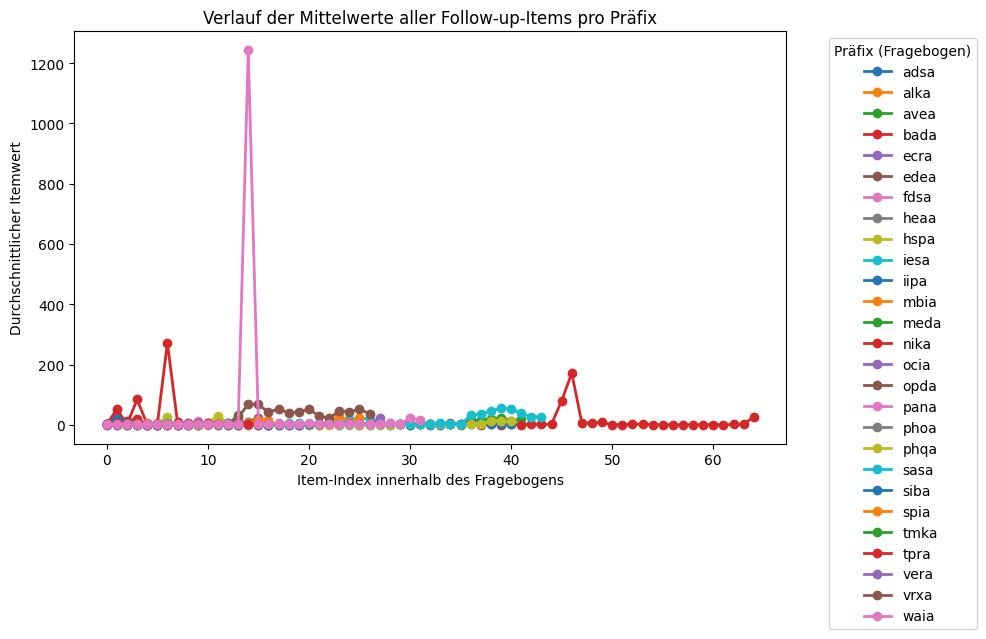

Erzeugte Score-Spalten: ['adsa_score', 'alka_score', 'avea_score', 'bada_score', 'ecra_score', 'edea_score', 'fdsa_score', 'heaa_score', 'hspa_score', 'iesa_score', 'iipa_score', 'mbia_score', 'meda_score', 'nika_score', 'ocia_score', 'opda_score', 'pana_score', 'phoa_score', 'phqa_score', 'sasa_score', 'siba_score', 'spia_score', 'tmka_score', 'tpra_score', 'vera_score', 'vrxa_score', 'waia_score']


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Alle Spaltennamen holen
columns = df_encoded.columns

# Screening-Spalten finden (endet auf "vorh")
screenings = [c for c in columns if c.endswith("vorh")]

# Neues DataFrame für die kombinierten Scores
df_combined = pd.DataFrame(index=df_encoded.index)
# Plot vorbereiten
plt.figure(figsize=(10, 6))

for scr in screenings:
    prefix = scr[:-4]   # alles vor "vorh" = Präfix, z.B. "adsa" oder "alka"

    # Alle Spalten, die mit diesem Präfix beginnen, aber nicht das Screening selbst sind
    followups = [c for c in columns if c.startswith(prefix) and not c.endswith("vorh")]
    df_followups = df_encoded[followups].select_dtypes(include=[np.number])

    if len(followups) == 0:
        continue

    # Mittelwert über alle Unterfragen bilden
    df_combined[prefix + "_score"] = df_followups.mean(axis=1)

    # Wenn Screening = 0, dann Score = 0 setzen
    df_combined.loc[df_encoded[scr] == 0, prefix + "_score"] = 0

    # --- Plot: alle Unterfragen als Linie (z. B. Mittelwert über Personen) ---
    mean_values = df_followups.mean(axis=0)  # Mittelwert jeder Spalte über alle Personen
    plt.plot(mean_values.values, marker='o', linewidth=2, label=prefix)

# Diagramm formatieren

plt.title("Verlauf der Mittelwerte aller Follow-up-Items pro Präfix")
plt.xlabel("Item-Index innerhalb des Fragebogens")
plt.ylabel("Durchschnittlicher Itemwert")
plt.legend(title="Präfix (Fragebogen)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Erzeugte Score-Spalten:", list(df_combined.columns))

In [ ]:
df_followups.head()

,waiai301,waiai302,waiai303,waiai304,waiai305,waiai306,waiai307,waiai308,waiai309,waiai310,...,waiai400,waiai500,waiai600,waiai701,waiai702,waiai703,waiai704,waiai700,waiarw01,waiarw02
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,...,4.0,3.0,4.0,3.0,3.0,3.0,9.0,3.0,29.0,21.0
2,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,...,5.0,2.0,7.0,1.0,3.0,2.0,6.0,2.0,31.0,23.0
3,3.0,1.0,3.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,...,4.0,1.0,7.0,1.0,1.0,1.0,3.0,1.0,21.0,13.0
4,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,...,6.0,5.0,7.0,3.0,3.0,3.0,9.0,3.0,42.0,26.0


In [ ]:
corr_matrix = df_combined.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Korrelationsmatrix aller Items")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df_combined.copy()

# Skalieren wichtig für Faktoranalyse
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=5, rotation='oblimin')
fa.fit(X_scaled)

# zeigt, welche Items zu welcher Dimension gehören
loadings = pd.DataFrame(fa.loadings_, index=X.columns)
print(loadings.round(3))
